# Dados de estrutura organizacional da APF

O SIORG é o sistema estruturante que contém toda a estrutura dos órgãos e entidades da Administração Pública Federal (APF).

In [1]:
import random

import pandas as pd
import requests
from matplotlib import pyplot as pp

O SIORG possui uma API que retorna dados em formato JSON.

* Conjunto de dados: [Dados da Estrutura Organizacional do Poder Executivo Federal (Sistema SIORG)](https://dados.gov.br/dados/conjuntos-dados/dados-da-estrutura-organizacional-do-poder-executivo-federal-sistema-siorg)
* [Documentação Swagger](https://api.siorg.economia.gov.br/)

## Carga dos dados

Como o volume de dados é muito grande, vamos consultar o JSON que
retorna os dados com a estrutura resumida, isto é, com menos atributos de dados.

In [2]:
REDUMIDA_URL = "https://estruturaorganizacional.dados.gov.br/doc/estrutura-organizacional/resumida.json"

In [3]:
response = requests.get(REDUMIDA_URL)

/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unverified HTTPS request is being made to host 'estruturaorganizacional.dados.gov.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [4]:
resumida = response.json()

In [5]:
resumida.keys()

dict_keys(['servico', 'unidades'])

A chave `servico` mostra eventuais mensagens de erro.
Os dados mesmo estão em `unidades`. Vejamos 2 exemplos aleatórios.

In [6]:
random.sample(resumida["unidades"],2)

[{'codigoUnidade': 'https://estruturaorganizacional.dados.gov.br/id/unidade-organizacional/267360',
  'codigoUnidadePai': 'https://estruturaorganizacional.dados.gov.br/id/unidade-organizacional/258295',
  'codigoOrgaoEntidade': 'https://estruturaorganizacional.dados.gov.br/id/unidade-organizacional/100902',
  'codigoTipoUnidade': 'https://estruturaorganizacional.dados.gov.br/id/tipo-unidade/unidade-administrativa',
  'nome': 'Coordenação de Pesquisa e Pós-Graduação',
  'sigla': 'CPPG',
  'codigoEsfera': 'https://estruturaorganizacional.dados.gov.br/id/esfera/1',
  'codigoPoder': 'https://estruturaorganizacional.dados.gov.br/id/poder/1',
  'codigoNaturezaJuridica': 'https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/4',
  'codigoSubNaturezaJuridica': 'https://estruturaorganizacional.dados.gov.br/id/subnatureza-juridica/17',
  'nivelNormatizacao': 'ATO_INTERNO',
  'versaoConsulta': '110.0.1',
  'dataInicialVersaoConsulta': '2020-09-28',
  'dataFinalVersaoConsulta': None,
 

Poucas informações, mas já dá para tirar alguma coisa.
Vamos jogar os dados em um dataframe.

In [7]:
df = pd.DataFrame(resumida["unidades"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86497 entries, 0 to 86496
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   codigoUnidade                86497 non-null  object
 1   codigoUnidadePai             86497 non-null  object
 2   codigoOrgaoEntidade          86497 non-null  object
 3   codigoTipoUnidade            86497 non-null  object
 4   nome                         86497 non-null  object
 5   sigla                        86497 non-null  object
 6   codigoEsfera                 86497 non-null  object
 7   codigoPoder                  86497 non-null  object
 8   codigoNaturezaJuridica       86489 non-null  object
 9   codigoSubNaturezaJuridica    44992 non-null  object
 10  nivelNormatizacao            86497 non-null  object
 11  versaoConsulta               86494 non-null  object
 12  dataInicialVersaoConsulta    86494 non-null  object
 13  dataFinalVersaoConsulta      0 

## Perguntas

Com os dados carregados, podemos nos fazer algumas perguntas:
- Quais são as naturezas jurídicas os órgãos?
- Quantos e quais são os Ministérios?
- Qual é a estrutura da SEGES

### Natureza Jurídica

Algo que pode ser analisado entre esses poucos atributos é o código de natureza jurídica.

In [9]:
df["codigoNaturezaJuridica"].value_counts()

https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/4    40535
https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/3    28352
https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/2    10214
https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/1     6147
https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/6      906
https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/7      335
Name: codigoNaturezaJuridica, dtype: int64

Não diz muita coisa, se não soubermos o que significam os códigos.

In [10]:
codigos_nj = df["codigoNaturezaJuridica"].dropna().unique()

Vimos que são apenas 6 valores distintos, então não há problema em iterar requisições http para
consultar os valores de cada um.

Antes de fazer muitas requisições, vamos desabilitar os *warnings* para não poluir o caderno.

In [11]:
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

In [12]:
codigo_nj = codigos_nj[0]
response = requests.get(codigo_nj)
response.json()

{'servico': {'codigoErro': 0,
  'mensagem': 'Processamento sem erros',
  'data': '2024-03-08',
  'versaoServico': '4.0.1',
  'ipRequisitante': '200.198.196.202',
  'ticket': None},
 'naturezaJuridica': [{'codigoNaturezaJuridica': 3,
   'descricaoNaturezaJuridica': 'Administração Direta',
   'ativo': 'SIM'}]}

In [13]:
codigo_nj_map = {
    codigo_nj:
    requests.get(codigo_nj).json()["naturezaJuridica"][0]["descricaoNaturezaJuridica"]
    for codigo_nj in codigos_nj
}
codigo_nj_map

{'https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/3': 'Administração Direta',
 'https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/1': 'Empresa Pública',
 'https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/2': 'Fundação Pública',
 'https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/6': 'Sociedade de Economia Mista',
 'https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/4': 'Autarquia',
 'https://estruturaorganizacional.dados.gov.br/id/natureza-juridica/7': 'Órgão Público Autônomo Federal'}

In [14]:
# Cria a nova coluna com o nome da natureza jurídica
df["natureza_juridica"] = df["codigoNaturezaJuridica"].dropna().apply(lambda codigo_nj: codigo_nj_map[codigo_nj])

In [15]:
qtde_nj = df["natureza_juridica"].value_counts()
qtde_nj

Autarquia                         40535
Administração Direta              28352
Fundação Pública                  10214
Empresa Pública                    6147
Sociedade de Economia Mista         906
Órgão Público Autônomo Federal      335
Name: natureza_juridica, dtype: int64

Existem mais de 40 mil autarquias no Brasil? Certamente que não. Esse número
contabiliza as unidades administrativas, como cada pequena repartição ou
escritório. As autarquias geralmente as têm em maior quantidade porque estão
espalhadas pelo Brasil, enquanto os ministérios (administração direta) tem
suas unidades administrativas relativamente concentradas em Brasília.

Precisamos, portanto, filtrar os resultados para contabilizar somente os que
são órgãos e entidades.

In [16]:
qtde_tipo_unidade = df["codigoTipoUnidade"].value_counts()
qtde_tipo_unidade

https://estruturaorganizacional.dados.gov.br/id/tipo-unidade/unidade-administrativa    84269
https://estruturaorganizacional.dados.gov.br/id/tipo-unidade/unidade-colegiada          1919
https://estruturaorganizacional.dados.gov.br/id/tipo-unidade/entidade                    214
https://estruturaorganizacional.dados.gov.br/id/tipo-unidade/orgao                        87
https://estruturaorganizacional.dados.gov.br/id/tipo-unidade/ente                          8
Name: codigoTipoUnidade, dtype: int64

In [17]:
TIPO_ORGAO = "https://estruturaorganizacional.dados.gov.br/id/tipo-unidade/orgao"
TIPO_ENTIDADE = "https://estruturaorganizacional.dados.gov.br/id/tipo-unidade/entidade"

In [18]:
df[df["codigoTipoUnidade"].isin((TIPO_ORGAO, TIPO_ENTIDADE))]["nome"]

2                              Governo do Distrito Federal
3                       Financiadora de Estudos e Projetos
28       Banco Nacional de Desenvolvimento Econômico e ...
585      Fundação Instituto Brasileiro de Geografia e E...
1476              Instituto de Pesquisa Econômica Aplicada
                               ...                        
86492     Tribunal Regional do Trabalho da 20ª Região (SE)
86493     Tribunal Regional do Trabalho da 21ª Região (RN)
86494     Tribunal Regional do Trabalho da 22ª Região (PI)
86495     Tribunal Regional do Trabalho da 23ª Região (MT)
86496     Tribunal Regional do Trabalho da 24ª Região (MS)
Name: nome, Length: 301, dtype: object

Aqui vemos que estão incluídos órgãos de outras unidades da federação
(Governo do Distrito Federal) e outros poderes (tribunais). Precisamos
filtrar também por esfera e poder, para encontrar somente o executivo federal.

In [19]:
qtde_codigo_esfera = df["codigoEsfera"].value_counts()
qtde_codigo_esfera

https://estruturaorganizacional.dados.gov.br/id/esfera/1    86118
https://estruturaorganizacional.dados.gov.br/id/esfera/2      378
                                                                1
Name: codigoEsfera, dtype: int64

Pela quantidade, como a maioria das UFs não usa o SIORG, supõe-se
que federal seja o primeiro. Vamos tirar a prova.

In [20]:
response = requests.get(qtde_codigo_esfera.index[0])
response.json()

{'servico': {'codigoErro': 0,
  'mensagem': 'Processamento sem erros',
  'data': '2024-03-08',
  'versaoServico': '4.0.1',
  'ipRequisitante': '200.198.196.202',
  'ticket': None},
 'esfera': [{'codigoEsfera': 1, 'descricaoEsfera': 'Federal', 'ativo': 'SIM'}]}

De fato, federal é o primero.

In [21]:
ESFERA_FEDERAL = qtde_codigo_esfera.index[0]

In [22]:
qtde_codigo_poder = df["codigoPoder"].value_counts()
qtde_codigo_poder

https://estruturaorganizacional.dados.gov.br/id/poder/1    85549
https://estruturaorganizacional.dados.gov.br/id/poder/3      721
https://estruturaorganizacional.dados.gov.br/id/poder/4      123
https://estruturaorganizacional.dados.gov.br/id/poder/2      101
                                                               3
Name: codigoPoder, dtype: int64

Igualmente, vamos verificar se o poder executivo é o primeiro.

In [23]:
response = requests.get(qtde_codigo_poder.index[0])
response.json()

{'servico': {'codigoErro': 0,
  'mensagem': 'Processamento sem erros',
  'data': '2024-03-08',
  'versaoServico': '4.0.1',
  'ipRequisitante': '200.198.196.202',
  'ticket': None},
 'poder': [{'codigoPoder': 1, 'descricaoPoder': 'Executivo', 'ativo': 'SIM'}]}

E constatamos que sim.

In [24]:
PODER_EXECUTIVO = qtde_codigo_poder.index[0]

Agora, vamos filtrar também pela esfera federal e poder executivo.

In [25]:
df_apf = df[
    df["codigoTipoUnidade"].isin((TIPO_ORGAO, TIPO_ENTIDADE)) &
    (df["codigoEsfera"] == ESFERA_FEDERAL) &
    (df["codigoPoder"] == PODER_EXECUTIVO)
]
df_apf["nome"]

3                       Financiadora de Estudos e Projetos
28       Banco Nacional de Desenvolvimento Econômico e ...
585      Fundação Instituto Brasileiro de Geografia e E...
1476              Instituto de Pesquisa Econômica Aplicada
1539     Conselho Nacional de Desenvolvimento Científic...
                               ...                        
86051    Secretaria de Comunicação Social da Presidênci...
86081                       Ministério da Igualdade Racial
86276                       Ministério dos Povos Indígenas
86301      Veículo de Desestatização MG Investimentos S.A.
86390    Ministério do Empreendedorismo, da Microempres...
Name: nome, Length: 257, dtype: object

Agora sim, temos os órgãos e entidades do poder executivo federal.
São atualmente 257.

In [26]:
qtde_nj = df_apf["natureza_juridica"].value_counts()
qtde_nj

Autarquia                         125
Fundação Pública                   43
Administração Direta               42
Empresa Pública                    31
Sociedade de Economia Mista        15
Órgão Público Autônomo Federal      1
Name: natureza_juridica, dtype: int64

<BarContainer object of 6 artists>

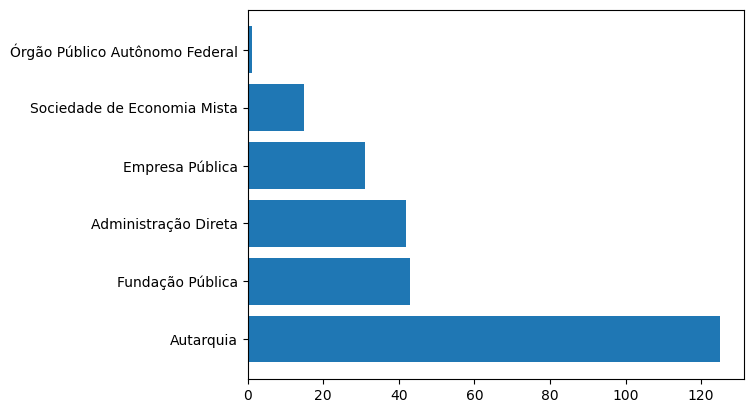

In [27]:
pp.barh(qtde_nj.index, qtde_nj.values)

### Ministérios

Se quisermos saber quais são os 42 Ministérios (ou Secretarias e outros
órgãos com *status* de ministério), temos que filter pela natureza
jurídica "Administração Direta".

In [28]:
df_apf[df_apf["natureza_juridica"] == "Administração Direta"]["nome"]

2050                              Presidência da República
2202     Gabinete de Segurança Institucional da Presidê...
2426                              Advocacia-Geral da União
5024                                Ministério da Educação
6481                    Ministério das Relações Exteriores
9404                                   Ministério da Saúde
11409       Assessoria Especial do Presidente da República
32022                        Vice-Presidência da República
33287       Ministério do Meio Ambiente e Mudança do Clima
36964          Gabinete Pessoal do Presidente da República
39502               Casa Civil da Presidência da República
39850                        Ministério de Minas e Energia
53270                                 Ministério da Defesa
53345    Secretaria de Relações Institucionais da Presi...
67608                                Ministério do Turismo
68141                         Controladoria-Geral da União
68343         Secretaria-Geral da Presidência da Repúbli

### SEGES

Para ver a estrutura da SEGES, primeiro precisamos encontrar o seu
código. Há várias maneiras de se descobrir, como pela consulta web
pública do SIORG. Mas vamos tirar dos dados aqui mesmo, por exemplo,
a partir da sigla. Quantas unidades têm a sigla "SEGES"?

In [29]:
unidades_sigla_seges = df[df["sigla"] == "SEGES"].loc[:,("codigoUnidade", "nome")]
unidades_sigla_seges

,codigoUnidade,nome
1564,https://estruturaorganizacional.dados.gov.br/i...,Serviço de Apoio à Gestão Contratual
22443,https://estruturaorganizacional.dados.gov.br/i...,Seção de Gestão Estratégica
64016,https://estruturaorganizacional.dados.gov.br/i...,Serviço de Gestão Estratégica
65254,https://estruturaorganizacional.dados.gov.br/i...,Seção de gestão de contratos
74534,https://estruturaorganizacional.dados.gov.br/i...,Setor de Gestão Estratégica
81855,https://estruturaorganizacional.dados.gov.br/i...,Secretaria de Gestão e Inovação


A "SEGES" que queremos é a última da lista.

In [30]:
unidades_sigla_seges.iloc[-1]

codigoUnidade    https://estruturaorganizacional.dados.gov.br/i...
nome                               Secretaria de Gestão e Inovação
Name: 81855, dtype: object

In [31]:
CODIGO_SEGES = unidades_sigla_seges.iloc[-1]["codigoUnidade"]
CODIGO_SEGES

'https://estruturaorganizacional.dados.gov.br/id/unidade-organizacional/37003'

Para entender a estrutura, vamos ver o que está diretamente abaixo da SEGES.

In [33]:
df[df["codigoUnidadePai"] == CODIGO_SEGES].loc[:,["nome", "sigla"]]

,nome,sigla
81996,Diretoria de Modelos Organizacionais,DEMOR
82054,Diretoria de Normas e Sistemas de Logística,DELOG
82136,Comissão Interministerial de Sustentabilidade ...,CISAP
82170,"Diretoria de Informações, Serviços e Sistemas ...",DTGES
82252,Comitê Gestor da Rede Nacional de Contratações...,CGRNCP
82299,Central de Compras,CENTRAL
82409,Comissão Gestora da Plataforma +Brasil,CGPBr
82605,Gabinete,GABIN-SEGES
82616,Diretoria de Transferências e Parcerias da União,DTPAR
82707,Diretoria de Inovação Governamental,DINOV
